# Classifying presence  of Angiographic Heart Disease  

### DSCI 100 004 Group 24 Report

## Introduction

### Background
Heart diseases are conditions that affect the heart's structure and function. They can develop into a serious stage and threaten someone’s life, so it is very important to make an early diagnosis and apply treatment as soon as possible. Heart diseases come in many different forms: coronary artery disease, heart rhythm disorders, heart valve disease, cardiomyopathy, congenital heart disease, pericardium, and heart failure. In our research, we will be analyzing coronary angiography disease which is the narrowing of blood vessels and constriction of proper blood flow.

### Question
Can we use classification to classify the presence and severity of angiographic disease in a patient based on their age, sex, resting blood pressure, cholesterol level, maximum heart rate, and chest pain?    

### Dataset 
The dataset is collected by researchers in hospitals from Cleveland, Hungary, Long Beach California, and Switzerland. The dataset can be found here https://archive.ics.uci.edu/dataset/45/heart+disease. The dataset orignally contained 76 attributes but researchers have reduced it to 14 attributes. Them being,
- `age` 
- `sex`

        -- Value 1: Male
        -- Value 2: Female
- `cp` - chest pain type

        -- Value 1: typical angina
        -- Value 2: atypical angina
        -- Value 3: non-anginal pain
        -- Value 4: asymptomatic
- `trestbps` - resting blood pressure (in mm Hg on admission to the hospital)
- `chol` - serum cholesterol in mg/dl
- `fbs`- (fasting blood sugar > 120 mg/dl)  (1 = true; 0 = false)
- `restecg` - resting electrocardiographic results

        -- Value 0: normal
        -- Value 1: having ST-T wave abnormality 
        -- Value 2: showing probable or definite left ventricular hypertrophy

- `thalach` -maximum heart rate achieved
- `exang` - exercise induced angina (1 = yes; 0 = no)
- `oldpeak` - ST depression induced by exercise relative to rest
- `slope` - the slope of the peak exercise ST segment

        -- Value 1: upsloping
        -- Value 2: flat
        -- Value 3: downsloping
- `ca` - number of major vessels (0-3)
- `thal`

        -- Value 3: normal
        -- Value 6: fixed defect
        -- Value 7: reversable defect
- `num` -diagnosis of heart disease (angiographic disease status)

        -- Value 0: < 50% diameter narrowing
        -- Value 1: > 50% diameter narrowing



**Note**: The variable `num` ranges from 0-4 where 0 represents no presence of a disease , and values 1-4 indicate a presence of disease  where the severity increases as the value increases.

## Method

We will conduct our data analysis by building a K-Nearest Neighbors classification model to predict for the presence of heart disease. We will use the variables Age, Sex, Resting Blood Pressure (mm Hg), Cholesterol (mg/dl), Max Heart Rate, and Type of Chest Pain as our predictors and predict for the presence of heart disease in a patient.

**{INSERT WHY WE ARE USING THESE PREDICTOR VARIABLES}**

The data will first be tidied/cleaned, and split into a training and testing. We will summarize and visualize some trends in the data so that it can be better understood and build context to what kind of data we are working with.

The model will be trained on the training set and we will perform tuning and cross validation to find an optimal number of neighbors to ensure the best accuracy. Then, we will create a final model with the optimal neighbors and run the new model on the testing set. We will then collect the metrics and organize it in a table and a graph to see the performance and accuracy of the model in achieving the goal.

### Installation

Before beginning the analysis the libraries `cowplot`, `kknn`, and `GGally` must be installed. To install the library run the install cell below.

In [1]:
install.packages("cowplot")
install.packages("kknn")
install.package("GGally")

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



### Libraries

Next we will import the libraries `tidyverse`, `tidymodels`, `dplyr`, `repr`, and 
the previously installed `cowplot`, `kknn`, and `GGally`. 

These libraries will be used to read, clean, split, summarize, and visualize the dataset. They will also be used for the methods section when we create our analysis model. 

In [2]:
library(tidyverse)
library(tidymodels)
library(dplyr)
library(repr)
library(cowplot)
library(kknn)
library(GGally)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.4.2     ✔ purrr   1.0.1
✔ tibble  3.2.1     ✔ dplyr   1.1.1
✔ tidyr   1.3.0     ✔ stringr 1.5.0
✔ readr   2.1.3     ✔ forcats 0.5.2
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.2     ✔ rsample      1.1.1
✔ dials        1.1.0     ✔ tune         1.0.1
✔ infer        1.0.4     ✔ workflows    1.1.2
✔ modeldata    1.0.1     ✔ workflowsets 1.0.0
✔ parsnip      1.0.3     ✔ yardstick    1.1.0
✔ recipes      1.0.4     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() masks read

### Reading Data
The data is sourced from a UC Irvine Machine Learning Repository, found here https://archive.ics.uci.edu/dataset/45/heart+disease.

The relevant files have been add to this repository's `data` directory and pushed to GitHub. This file will read the data file from the GitHub URL to the raw data. The column names can be found in the heart-disease.names file in the `data` directory. 

In [3]:
set.seed(1234) # Seed value

# Create list of column names found in data/heart-disease.names
column_names <- c("age", "sex", "cp", "trestbps", "chol", "fbs", "restecg", "thalach", "exang", "oldpeak", "slope", "ca", "thal", "num")

# Read in data
dataset <- read_delim("https://raw.githubusercontent.com/tamzeedq/dsci-100_group_project/main/data/processed.cleveland.data", delim = ",", col_names = column_names)
head(dataset, 5) # Preview first 5 rows

Rows: 303 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (2): ca, thal
dbl (12): age, sex, cp, trestbps, chol, fbs, restecg, thalach, exang, oldpea...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>
63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0


*Table 1 - The Original Dataset*

### Tidying/Wrangling the Data

Columns `ca` and `thal` are the only columns to have missing data, and since they are not relevant to our analysis we'll drop these two columns. Some column headers are also unclear, so we'll update the names that are relevant to our analysis to improve readability. 

We will also convert the column representing presence of heart disease (`presence`) from numbers ranging form 0-4 to instead be binary with "TRUE" representing or "FALSE" representing no presence . This is because, as seen below, there isn't an equal spread among all the classes of presence. 


In [4]:
# Get the counts of each presence type
presence_count <- dataset |>
                group_by(num) |> # Column indicating presence is called num in original dataset
                summarize(count = n())
presence_count

num,count
<dbl>,<int>
0,164
1,55
2,36
3,35
4,13


*Table 1.1 - The count of each type of presence in each presence type indicating imbalance in the data*

In [5]:
updated_column_names <- c("age", "sex", "cp_type", "rest_bps", "chol", "fbs", "restecg", "max_heart_rate", "exang", "oldpeak", "slope", "ca", "thal", "presence")

colnames(dataset) <- updated_column_names # Updated the column names
updated_dataset <- dataset |>
            select(-ca, -thal) |> # Select every column except for ca and thal
            mutate(presence = as_factor(presence != 0)) # Convert reponse variable column datatype

head(updated_dataset, 5) # Preview first 5 rows

age,sex,cp_type,rest_bps,chol,fbs,restecg,max_heart_rate,exang,oldpeak,slope,presence
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
63,1,1,145,233,1,2,150,0,2.3,3,FALSE
67,1,4,160,286,0,2,108,1,1.5,2,TRUE
67,1,4,120,229,0,2,129,1,2.6,2,TRUE
37,1,3,130,250,0,0,187,0,3.5,3,FALSE
41,0,2,130,204,0,2,172,0,1.4,1,FALSE


*Table 2 - Updated Dataset after tidying and wrangling*

### Split the Data

The updated dataset is split into a training set and testing set, 75% of the data will be used to create a training set while the remaining 25% will be used to create a testing dataset.

In [6]:
set.seed(1234) # Seed for random split

# Split the data into a training and testing set
data_split <- initial_split(updated_dataset, prop = 0.75, strata = presence)  
training_data <- training(data_split)   
testing_data <- testing(data_split)

### Data Summary

We will do two things to summarize the training dataset. First, we will look at the count of rows for each category of the variable we wish to predict(`presence`). Second, we will look at the mean of the quantitative variables that we want to use to predict for `presence`: `age`, `rest_bps`, `chol`, `max_heart_rate`. 

**Note**: Although we want to use `cp_type`(chest pain type) and `sex` as our predictor variables, they are categorical variables therefore a mean value can not be found for it and won't be included in the mean table.  

In [7]:
# Count the number of rows for each class of presence (True or False)
presence_count <- training_data |>
                group_by(presence) |>
                summarize(count = n())
presence_count

# Calculate the mean values of the quantitative variables
variable_means <- training_data |>
            summarize(mean_age=mean(age), 
                      mean_rest_bps=mean(rest_bps), 
                      mean_chol=mean(chol), 
                      mean_max_rate=mean(max_heart_rate))
variable_means

presence,count
<fct>,<int>
FALSE,123
TRUE,104


mean_age,mean_rest_bps,mean_chol,mean_max_rate
<dbl>,<dbl>,<dbl>,<dbl>
54.52863,130.7445,245.9604,149.0441


*Table 3/4 - Dataset Summaries*

### Data Visuals

Due to having multiple predictor variables, creating a plot with all of our predictor variables together would make for an unclear plot. So below is a scatter plot proving an example of a plot to visualize the association between some our predictor variables. The graph compares age against cholesterol, max heart rate, and resting blood pressure, and is classified by shapes that relate to different chest pains. The different colors represent the different classifications for our response variable (`presence`).

**Add ggpair plot**

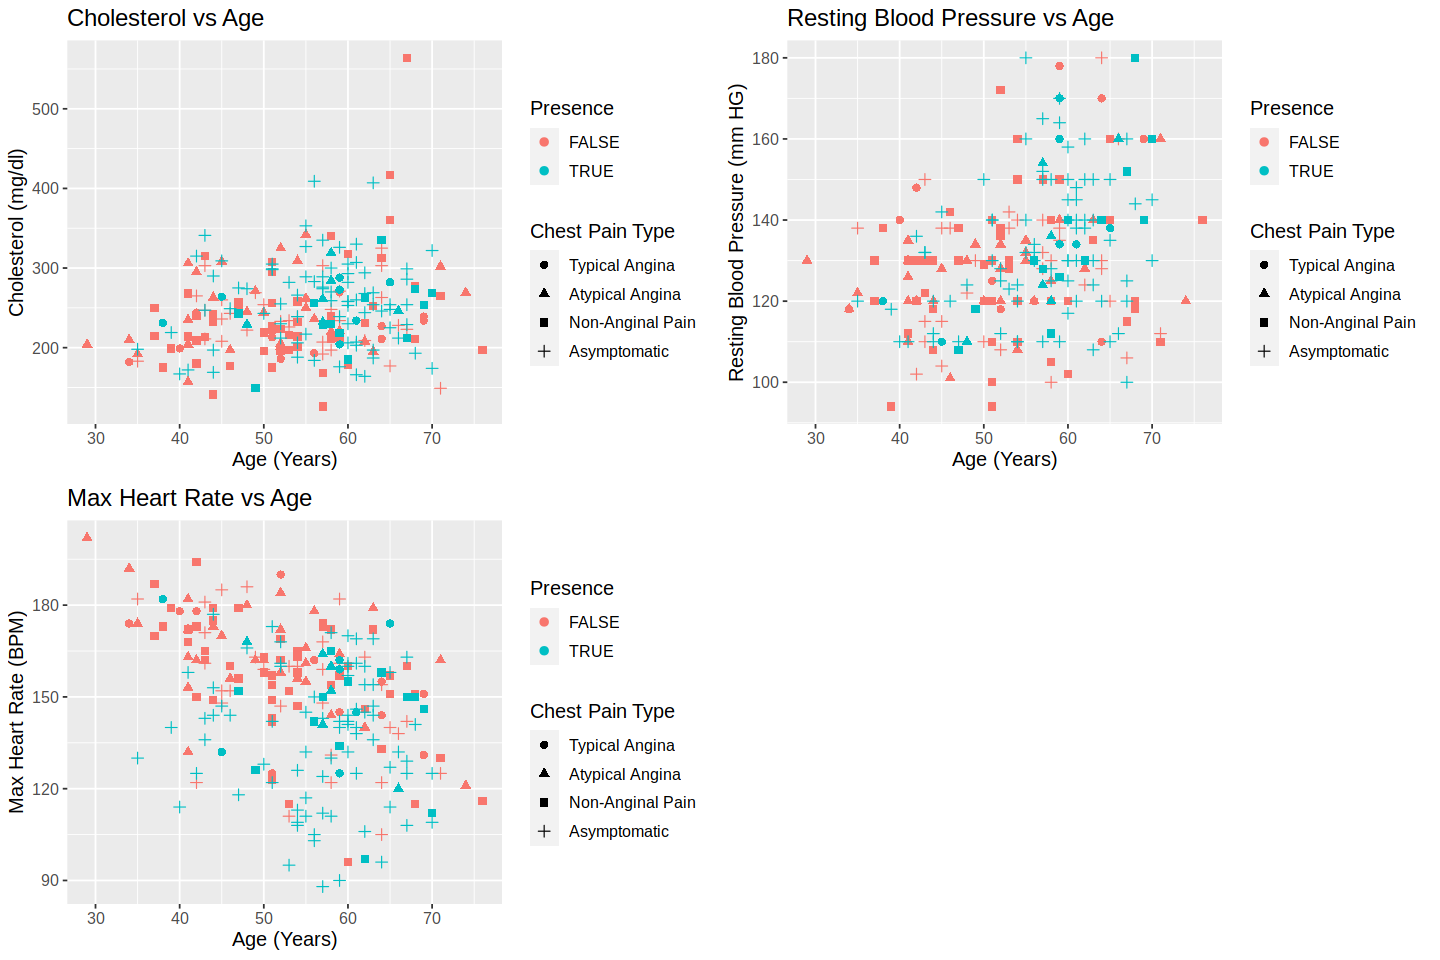

In [8]:
options(repr.plot.width = 12, repr.plot.height = 8)

chest_pain_labels <- c("Typical Angina", "Atypical Angina", "Non-Anginal Pain", "Asymptomatic")

age_chol_plot <- training_data |>
    ggplot(aes(x = age, 
               y = chol, 
               colour = presence,
               shape = factor(cp_type, labels = chest_pain_labels))) +
    labs(x = "Age (Years)",
         y = "Cholesterol (mg/dl)",
         colour = "Presence",
         shape = "Chest Pain Type") +
    geom_point(size = 2) +
    ggtitle("Cholesterol vs Age") +
    theme(text = element_text(size = 12))

age_rest_bps_plot <- training_data |>
    ggplot(aes(x = age, 
               y = rest_bps, 
               colour = presence,
               shape = factor(cp_type, labels = chest_pain_labels))) +
    labs(x = "Age (Years)",
         y = "Resting Blood Pressure (mm HG)",
         colour = "Presence",
         shape = "Chest Pain Type") +
    geom_point(size = 2) +
    ggtitle("Resting Blood Pressure vs Age") +
    theme(text = element_text(size = 12))

age_max_heart_rate_plot <- training_data |>
    ggplot(aes(x = age, 
               y = max_heart_rate, 
               colour = presence,
               shape = factor(cp_type, labels = chest_pain_labels))) +
    labs(x = "Age (Years)",
         y = "Max Heart Rate (BPM)",
         colour = "Presence",
         shape = "Chest Pain Type") +
    geom_point(size = 2) +
    ggtitle("Max Heart Rate vs Age") +
    theme(text = element_text(size = 12))

plot_grid(age_chol_plot, age_rest_bps_plot, age_max_heart_rate_plot, ncol = 2, nrow=2)

*Figure 1 - Visualizing spread and potential trends in the dataset*

We then use `ggpair` plot to show the different relationships the predictors have with each other and how much that factors into the prediction of presence.

Results show that rest bps and cholesterol doesn't correlate with the presence or each other very much. As a contrast, age and max heart rate correlates negatively with each other and also show higher positive results with greater age or lower max heart rate. 

It is also worth mentioning cp type 4 has the most positive results in contrast to the negative results which peaks at cp type 3.

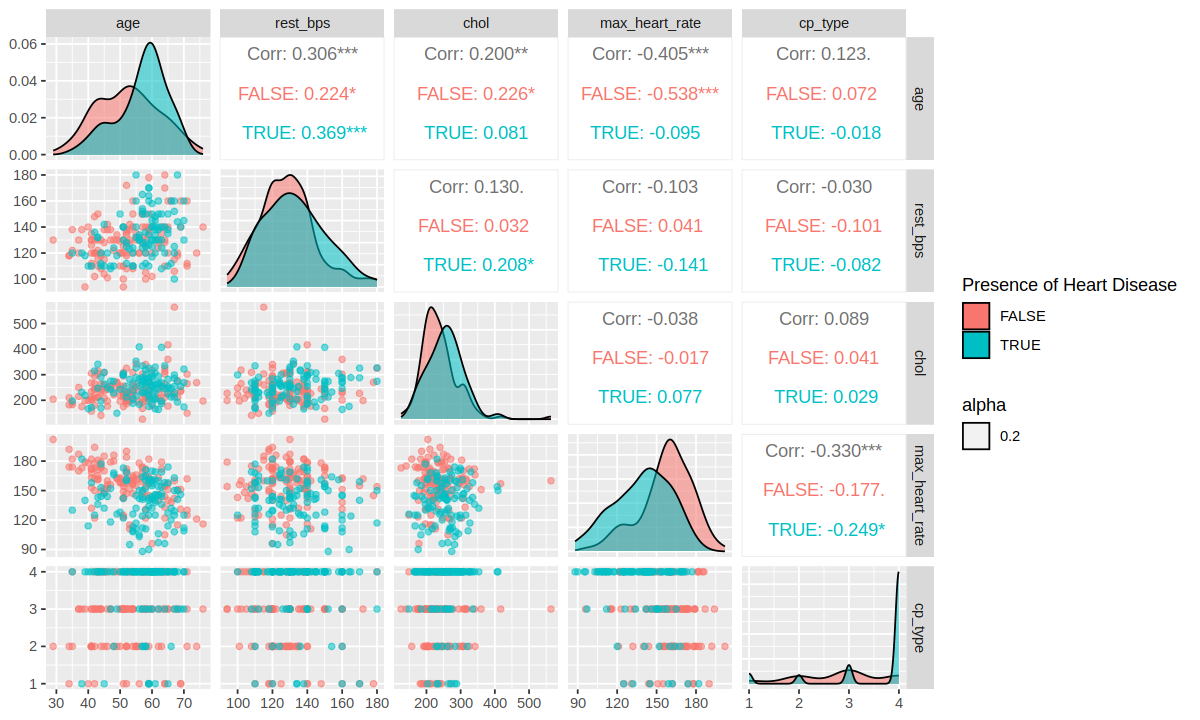

In [8]:
options(repr.plot.width=10, repr.plot.height=6)
training_data |> select(presence,age,rest_bps,chol,max_heart_rate,cp_type) |> ggpairs(legend=1, columns = c(2,3,4,5,6), ggplot2::aes(color = presence, alpha = 0.2)) +
labs(fill = "Presence of Heart Disease")

*Figure 2 - Visualizing predictors using `ggpair`*

By analyzing pair graph and scatter plots, we could see that the relationship between `age` and `presence`, and relationship between `max heart rate` and `presence` are relatively strong. The relationship between `resting blood pressure` and `presence`, the relationship between `cholesterol`and `presence`, the relationship between `chest pain type` and `presence` are weaker. 

## Model

After achieving some understanding of the dataset, we are ready to start building the model. In *Figure 1* there are weak trends that can be seen when analyzing a few variables at a time, but overall the data is quite scattered. This is why we will be using multiple predictor variables to ensure more accurate results.

As mentioned earlier, we will use the variables Age, Sex, Resting Blood Pressure (mm Hg), Cholesterol (mg/dl), Max Heart Rate, and Type of Chest Pain as our predictors and predict for the presence of heart disease in a patient. In the cell below we will create the Spec and Recipe for our model. An important thing to note is that we will scale/normalize all our predictors to ensure that the distance calculations made by the KNN model are not biased by a particular predictor variable. Also, cross validation can be a random process so we set the seed to ensure reproducibility of the results.

In [14]:
# Build Spec
knn_spec <- nearest_neighbor(weight_func="rectangular", neighbors=tune()) |>
            set_engine("kknn") |>
            set_mode("classification")

# Build Recipe
knn_recipe <- recipe(presence ~ age + sex + rest_bps + chol + max_heart_rate + cp_type, data = training_data)|>
            step_center(all_predictors())|>
            step_scale(all_predictors())

Next we set up our model in a workflow with cross validation. The cross validation is set up for a 5 fold cross validation and will test for k values from 1-15.

In [15]:
set.seed(1234)

# Cross validate to find optimal K
knn_vfold <- vfold_cv(training_data, v = 5, strata = presence)
k_vals <- tibble(neighbors = seq(from=1, to=15, by=1))

knn_fit <- workflow() |>
    add_recipe(knn_recipe) |>
    add_model(knn_spec) |>
    tune_grid(resamples = knn_vfold, grid = k_vals)

Let's check the accuracy of our model at different k values.

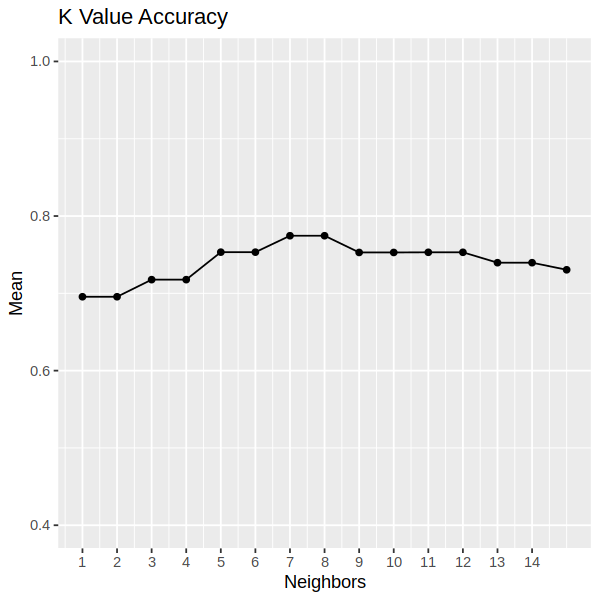

In [16]:
set.seed(1234)

#Check the accuracy of the model at various K
knn_results <- knn_fit |>
collect_metrics()

knn_accuracy <- knn_results |> 
      filter(.metric == "accuracy")

options(repr.plot.width = 5, repr.plot.height = 5)
accuracy_versus_k <- ggplot(knn_accuracy, aes(x = neighbors, y = mean))+
      geom_point() +
      geom_line() +
      labs(x = "Neighbors", y = "Mean") +
      ggtitle("K Value Accuracy") +
      scale_x_continuous(breaks = seq(0, 14, by = 1)) +  # adjusting the x-axis
      scale_y_continuous(limits = c(0.4, 1.0)) # adjusting the y-axis

accuracy_versus_k

*Table 5 - Accuracy at different values for neighbors*

### Result

Based on our cross validation we found that the optimal number of neighbors is 7 which yielded the highest accuracy. Let's make our final model and analyze it's performance against the training dataset.

In [12]:
# Make new model
potential_k_spec <- nearest_neighbor(weight_func="rectangular", neighbors=7)|>
                    set_engine("kknn")|>
                    set_mode("classification")

fit_potential_k <- workflow()|>
                    add_recipe(knn_recipe)|>
                    add_model(potential_k_spec)|>
                    fit(data=training_data)

# Run Predictions
potential_k_prediction <- predict(fit_potential_k, testing_data)|>
                        bind_cols(testing_data)

# Check results
confusion_potential_k <- potential_k_prediction|>
                        conf_mat(truth=presence, estimate=.pred_class)
confusion_potential_k

accuracy_potential_k <- potential_k_prediction |>
                        metrics(truth = presence, estimate = .pred_class) |>
                        filter(.metric == "accuracy")
accuracy_potential_k

          Truth
Prediction FALSE TRUE
     FALSE    30   10
     TRUE     11   25

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.7236842


*Table 6/7 - Model Confusion Matrix & Final model prediction accuracy (72.37%)*

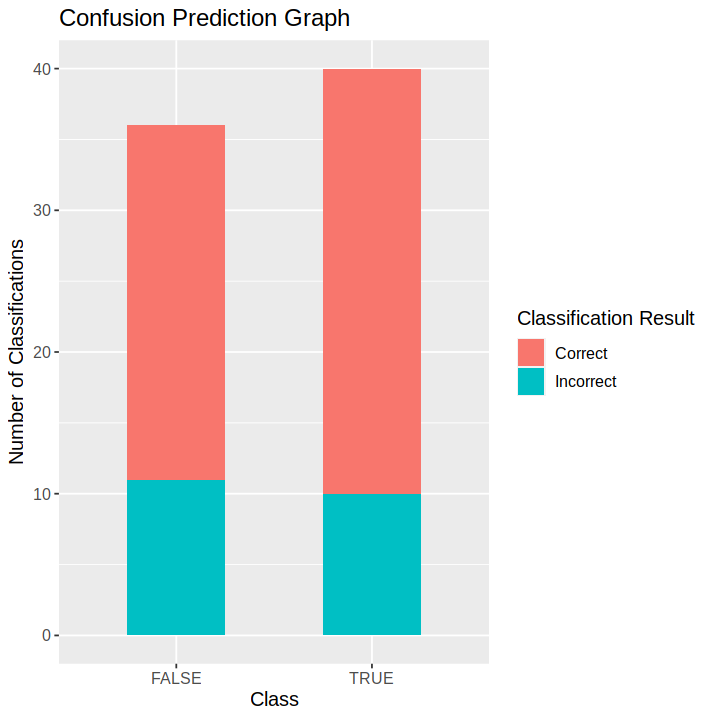

In [13]:
# Visualize the confusion matrix as a graph
options(repr.plot.width = 6, repr.plot.height = 6)

categories <- c("TRUE", "FALSE", "TRUE", "FALSE")
count <- c(30, 25, 10, 11)
prediction <- c("Correct", "Correct", "Incorrect", "Incorrect")

results_df <- data.frame(categories, count, prediction)

classification_results_plot <- results_df |>
    ggplot(aes(x = categories, y = count, fill = prediction)) +
    geom_bar(stat = "identity", width = 0.5) + 
    ggtitle("Confusion Prediction Graph") + 
    labs(x = "Class", y = "Number of Classifications", fill = "Classification Result") +
    theme(text = element_text(size = 12))

classification_results_plot

*Figure 3 - Confusion matrix visualized as a graph*

# Discussion
The performance of our model is surprising. The accuracy of our model is 72.37%. And the recall of our model is 71.42% with presence of heart disease as the positive variable (presence). Both of them are higher than expected. We were expecting an accuracy around 60% as we were limited by the number of quantitative variables to use as predictors in our dataset. The unexpected high accuracy and recall of our model indicates that there is a potential to use classification models in diagnosing the presence of coronary artery disease. The models can be helpful to detect a general presence of coronary artery disease in potential patients, saving more time for the medical team and the patients. Also, by examining the result, we can see that the variables we have chosen are significant to detecting coronary artery disease and result in a better success rate than a 50/50 guess. Furthermore, they are relatively easy to measure with simple blood tests and heart check-ups. Therefore, doctors can test patients with resources that are easier to access to achieve a quicker diagnosis and aid to their decision making of if they are under risk of coronary artery disease, and can look for professional medical help immediately. In addition, from our predictions of testing data using k-nearest neighbors, we are curious about what other algorithms or variables could be used to achieve a higher accuracy than our k-nearest neighbors model on predicting the presence of heart disease. Variables such as average heart rate or if the patient is a smoker, are types of data that could be useful but were not present in our dataset. Since not all of the data in the dataset were included due to a lot of missing measurements and the levels of heart disease were ignored when we built the model, we could not see the complete effectiveness of classification algorithms on predicting heart disease. Overall, involving classification models in diagnosis of coronary artery disease is possible. 


# Works Cited / References
Bots, Sophie, et al. “Sex differences in coronary heart disease and stroke mortality: a global assessment of the effect of ageing between 1980 and 2010”. BML Global Health, BML Journals, 27 March, 2017, https://gh.bmj.com/content/2/2/e000298.info. Accessed 7 December 2023. 

Haasenritter, Jörg, et al. “Does the patient with chest pain have a coronary heart disease? Diagnostic value of single symptoms and signs – a meta-analysis.” National Library of Medicine, PubMed Central, https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3490454/. Accessed 7 December 2023.

Hill, Joseph A. “Under pressure: How blood pressure affects heart disease risk | Heart.” UT Southwestern Medical Center, 6 June 2016, https://utswmed.org/medblog/high-blood-pressure-heart-disease/. Accessed 7 December 2023.

Jousilahti, Pekka, et al. “Serum Cholesterol Distribution and Coronary Heart Disease Risk.” AHA Journals, 24 March 1998, https://www.ahajournals.org/doi/full/10.1161/01.cir.97.11.1087. Accessed 7 December 2023.

Malakar, Arup Kr, et al. “A review on coronary artery disease, its risk factors, and therapeutics.” Wiley Online Library, 20 February 2019, https://onlinelibrary.wiley.com/doi/full/10.1002/jcp.28350. Accessed 7 December 2023.

National Institute on Aging. “Heart Health and Aging | National Institute on Aging.” National Institute on Aging, 1 June 2018, https://www.nia.nih.gov/health/heart-health/heart-health-and-aging. Accessed 7 December 2023.

Okrainec, Karen, et al. “Coronary Artery Disease in the Developing World.” ScienceDirect, Elsevier, 22 June 2004, https://www.sciencedirect.com/science/article/pii/S0002870304002042. Accessed 7 December 2023.

Veitch, John. “HIGH BLOOD PRESSURE AND CARDIOVASCULAR DISEASE - PMC.” National Library of Medicine, PubMed Central, 23 December 2019, https://www.ncbi.nlm.nih.gov/pmc/articles/PMC10243231/. Accessed 7 December 2023.

Zhang, Dongfeng, et al. “Association between resting heart rate and coronary artery disease, stroke, sudden death and noncardiovascular diseases: a meta-analysis.” Canadian Medicine Association Journal, CMAJ, 18 October 2016, https://www.cmaj.ca/content/188/15/E384. Accessed 7 December 2023.